### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt

### Import Dataset

In [2]:
# Load the dataset
data = pd.read_csv('Advertising.csv')

# Split the dataset into features (X) and target variable (y)
X = data.drop('Sales', axis=1)
y = data['Sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Apply Model Selection

In [3]:
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(),
    'SupportVectorMachine': SVR(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'KernelRidge': KernelRidge(),
}

### Evaluate the Model

In [4]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Measure run_time, rmse, and rmse_cv
    run_time = 0
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_cv = np.mean(np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)))
    
    results.append({'Model': name, 'Run Time': run_time, 'RMSE': rmse, 'RMSE_CV': rmse_cv})

# Display model evaluation results
results_df = pd.DataFrame(results)
print(results_df)

# Choose the best model
best_model_name = results_df.sort_values(by=['Run Time', 'RMSE', 'RMSE_CV']).iloc[0]['Model']
best_model = models[best_model_name]

                   Model  Run Time      RMSE   RMSE_CV
0       LinearRegression         0  1.788576  1.737981
1           RandomForest         0  0.794441  0.849912
2   SupportVectorMachine         0  2.266409  2.542278
3  DecisionTreeRegressor         0  1.314819  1.221337
4            KernelRidge         0  2.067882  2.010522


### Hyperparameter Tuning

Best Model RMSE: 0.7862625356711335


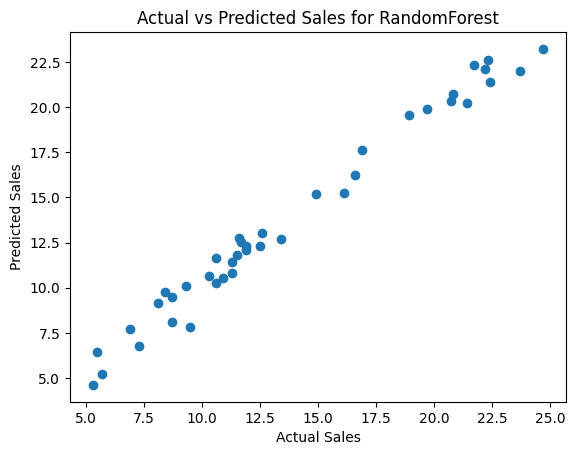

In [5]:
param_grid = {
    'LinearRegression': {},
    'RandomForest': {'n_estimators': [10, 50, 100, 200]},
    'SupportVectorMachine': {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'auto']},
    'DecisionTreeRegressor': {'criterion': ['mse', 'mae'], 'splitter': ['best', 'random']},
    'KernelRidge': {'alpha': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

if best_model_name in param_grid:
    grid_search = GridSearchCV(best_model, param_grid[best_model_name], cv=5, scoring="neg_mean_squared_error")
    grid_search.fit(X, y)

    # Get the best hyperparameters
    best_params = grid_search.best_params_

    # Train and test the model using the optimum parameters
    best_model.set_params(**best_params)
    best_model.fit(X_train, y_train)
    y_pred_best = best_model.predict(X_test)

    # Show the RMSE for the best model
    rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
    print(f"Best Model RMSE: {rmse_best}")

    # Plot the performance of the best model
    plt.scatter(y_test, y_pred_best)
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.title(f'Actual vs Predicted Sales for {best_model_name}')
    plt.show()
else:
    print("Hyperparameter tuning not defined for the chosen best model.")
